In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('../data/Spotify_data.xlsx')

In [3]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [4]:
df.music_recc_rating.value_counts(dropna=False)

music_recc_rating
3    190
4    174
5     86
2     56
1     14
Name: count, dtype: int64

- ordinal: Age, spotify_usage_period, music_recc_rating
- regular nominal: gender, spotify_subscription_plan, premium_sub_willingness, preffered_premium_plan, preferred_listening_content, fav_music_genre, music_time_slot, 
- multiple-choice nominal: spotify_listening_device, music_Influencial_mood, music_lis_frequency, music_expl_method

In [5]:
ordinal = ['Age', 'spotify_usage_period', 'music_recc_rating']

regular_nominal = [
    'Gender', 
    'spotify_subscription_plan', 
    'premium_sub_willingness', 
    'preffered_premium_plan', 
    'preferred_listening_content', 
    'fav_music_genre', 
    'music_time_slot'
]

multiple_choice_nominal = [
    'spotify_listening_device', 
    'music_Influencial_mood', 
    'music_lis_frequency', 
    'music_expl_method'
]

ordinal = ['Age', 'spotify_usage_period', 'music_recc_rating']

In [6]:
def multiple_choice_one_hot(df, column):
    """
    Given a dataframe and a column that contains multiple choice answers,
    create a new column for each choice.
    """
    # Get all possible choices
    choices = set()
    for choice in df[column]:
        choices.update([c for c in choice.split(', ') if ',' not in c])

    # Create a new column for each choice
    for choice in choices:
        new_column = choice.replace(' ', '_').lower()
        df[new_column] = df[column].apply(lambda x: choice in x)

    return df

In [7]:
df_music = df.copy().loc[:, :'music_recc_rating']

categoricals = dict()
reassign = dict()
for col in ordinal:
    categoricals[col] = pd.Categorical(df_music[col], ordered=True)
    reassign[col] = categoricals[col].codes

df_encoded = df_music.assign(**reassign)
df_encoded = pd.get_dummies(df_encoded, columns=regular_nominal)

for col in multiple_choice_nominal:
    df_encoded = multiple_choice_one_hot(df_encoded, col)
    df_encoded.drop(col, axis=1, inplace=True)

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

df_normalized.head()

,Age,spotify_usage_period,music_recc_rating,Gender_Female,Gender_Male,Gender_Others,spotify_subscription_plan_Free (ad-supported),spotify_subscription_plan_Premium (paid subscription),premium_sub_willingness_No,premium_sub_willingness_Yes,...,study_hours,workout_session,social_gatherings_,recommendations,others,social_media,search,radio,friends,playlists
0,0.25,1.000000,0.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.00,1.000000,0.25,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.50,0.333333,0.75,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.25,0.000000,0.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.25,0.000000,0.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_normalized)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

df_tsne.head()

,TSNE1,TSNE2
0,4.107043,5.490445
1,-38.091530,4.206161
2,0.174598,4.217821
3,10.663755,2.835401
4,8.340740,0.056673


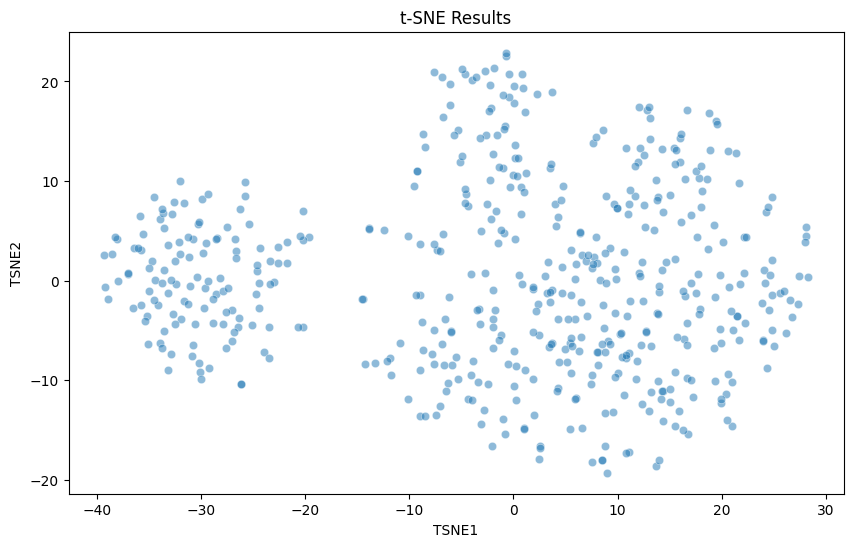

In [9]:
# Plot the t-SNE results using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_tsne, alpha=0.5)
plt.title('t-SNE Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [13]:
import numpy as np

df_tsne['cluster'] = np.nan
df_tsne.iloc[c1_df.index, 2] = 1
df_tsne.iloc[c2_df.index, 2] = 2
df_tsne.iloc[c3_df.index, 2] = 3

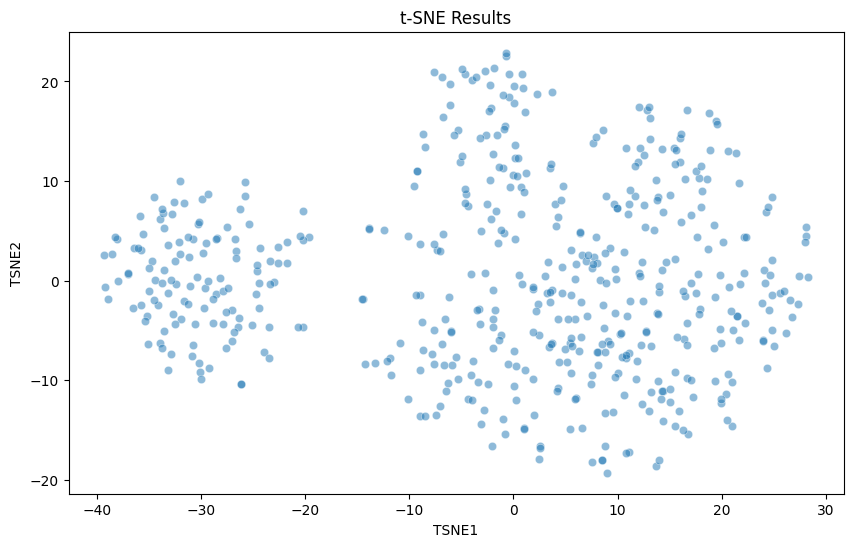

In [11]:
# Plot the t-SNE results using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=df_tsne, alpha=0.5)
plt.title('t-SNE Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [12]:
c1_df = df_tsne[(df_tsne['TSNE1'] > -12) & (df_tsne['TSNE1'] < 10) & (df_tsne['TSNE2'] > -40) & (df_tsne['TSNE2'] < -20)]
c2_df = df_tsne[(df_tsne['TSNE1'] > -40) & (df_tsne['TSNE1'] < -12) & (df_tsne['TSNE2'] > -10) & (df_tsne['TSNE2'] < 20)]
c3_df = df_tsne[(df_tsne['TSNE1'] > -10) & (df_tsne['TSNE1'] < 40) & (df_tsne['TSNE2'] > 0) & (df_tsne['TSNE2'] < 30)]

**Cluster 1**
- all 20-35
- accs mostly older than 2 yrs
- all but 1 are male
- all premium
- all but 1 prefer music to podcast
- most like melody as favorite
- most listen at night
- most listen for relaxation and uplifing 
- most listen when working, studying, traveling or leisure
- most use recommendations and playlists for exploration
- most rate spotify recommendation highly

**Cluster 2**
- most 20-35
- most accs are between 6 mths and 2 yrs
- all but 3 are female
- most free but plenty premium
- most prefer podcast but plenty music
- most like classical, but plenty like rap and pop
- most are afternoon but plenty morning
- most listen for uplifing and sadness 
- most listen when working, studying, traveling
- most use radios but plenty playlists
- most DO NOT rate spotify recommendation highly

**Cluster 3**
- most 20-35 but plenty of 12-20
- well distributed between old and new accs
- most are female
- most free but plenty premium
- all but 4 prefer music
- most like melody as favorite
- most are night
- most listen for relaxation and uplifing, but plenty for sadness and gatherings
- most listen when traveling, leisure, workout
- most use recommendations and playlists for exploration
- most rate spotify recommendation highly

In [58]:
lis_freqs = set()
for freq in df.music_expl_method:
    lis_freqs.update(freq.split(', '))
lis_freqs

{'Friends',
 'Others',
 'Playlists',
 'Radio',
 'Search',
 'Social media',
 'recommendations',
 'recommendations,Others'}

In [75]:
c3_vals = df.iloc[c3_df.index]
c3_vals

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
6,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,NaN,NaN,NaN,NaN,Ok
7,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Social gatherings or parties,leisure time,recommendations,5,Several times a week,Lifestyle and Health,Conversational,Both,Longer,Satisfied
9,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,"Office hours, While Traveling, Workout session",recommendations,4,Never,NaN,NaN,NaN,NaN,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Sadness or melan...","Study Hours, leisure time","recommendations, Others",4,Rarely,Lifestyle and Health,Educational,Well known individuals,Shorter,Ok
511,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Educational,Both,Shorter,Satisfied
513,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Free (ad-supported),No,NaN,Music,Kpop,Night,"Relaxation and stress relief, Uplifting and mo...","Study Hours, While Traveling, leisure time","recommendations, Playlists, Others",4,Never,NaN,NaN,NaN,NaN,Ok
514,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,While Traveling,"recommendations, Playlists",4,Rarely,NaN,Conversational,Both,Shorter,Satisfied


In [86]:
c3_vals.music_expl_method.value_counts()

music_expl_method
Playlists                                    67
recommendations, Playlists                   49
recommendations                              47
Others                                       20
recommendations, Playlists, Others           12
recommendations, Others                       8
Playlists, Radio                              4
recommendations, Playlists, Radio             4
Playlists, Others                             2
recommendations, Radio                        2
Radio                                         2
Others, Friends                               1
recommendations, Others, Social media         1
Radio, Others                                 1
recommendations, Playlists, Radio, Others     1
recommendations,Others, Social media          1
Playlists, Radio, Others                      1
Name: count, dtype: int64

In [38]:
def multiple_choice_one_hot(df, column):
    """
    Given a dataframe and a column that contains multiple choice answers,
    create a new column for each choice.
    """
    # Get all possible choices
    choices = set()
    for choice in df[column]:
        choices.update(choice.split(', '))

    # Create a new column for each choice
    for choice in choices:
        new_column = choice.replace(' ', '_').replace(',', '_').lower()
        df[new_column] = df[column].apply(lambda x: choice in x)

    return df

In [9]:
df.music_Influencial_mood.value_counts()

music_Influencial_mood
Relaxation and stress relief                                                                                     195
Uplifting and motivational                                                                                        67
Sadness or melancholy                                                                                             55
Relaxation and stress relief, Uplifting and motivational                                                          44
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties     35
Relaxation and stress relief, Sadness or melancholy                                                               33
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                   22
Social gatherings or parties                                                                                      16
Relaxation and stress relief, Uplifting a